In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


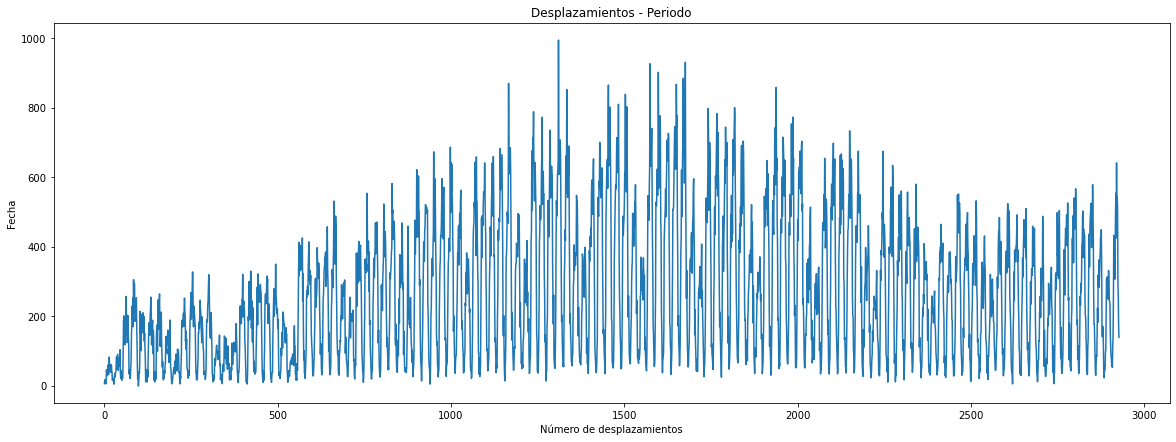

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

In [9]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)

PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)

PeriodoDesescalada['Lunes2AM'] = PeriodoDesescalada['ds'].apply(est_Lunes2AM)
PeriodoNnormalidad['Lunes2AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes2AM)

PeriodoDesescalada['Lunes3AM'] = PeriodoDesescalada['ds'].apply(est_Lunes3AM)
PeriodoNnormalidad['Lunes3AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes3AM)

PeriodoDesescalada['Lunes4AM'] = PeriodoDesescalada['ds'].apply(est_Lunes4AM)
PeriodoNnormalidad['Lunes4AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes4AM)

PeriodoDesescalada['Lunes5AM'] = PeriodoDesescalada['ds'].apply(est_Lunes5AM)
PeriodoNnormalidad['Lunes5AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes5AM)

PeriodoDesescalada['Lunes6AM'] = PeriodoDesescalada['ds'].apply(est_Lunes6AM)
PeriodoNnormalidad['Lunes6AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes6AM)

PeriodoDesescalada['Lunes7AM'] = PeriodoDesescalada['ds'].apply(est_Lunes7AM)
PeriodoNnormalidad['Lunes7AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes7AM)

PeriodoDesescalada['Lunes8AM'] = PeriodoDesescalada['ds'].apply(est_Lunes8AM)
PeriodoNnormalidad['Lunes8AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes8AM)

PeriodoDesescalada['Lunes9AM'] = PeriodoDesescalada['ds'].apply(est_Lunes9AM)
PeriodoNnormalidad['Lunes9AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes9AM)

PeriodoDesescalada['Lunes10AM'] = PeriodoDesescalada['ds'].apply(est_Lunes10AM)
PeriodoNnormalidad['Lunes10AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes10AM)

PeriodoDesescalada['Lunes11AM'] = PeriodoDesescalada['ds'].apply(est_Lunes11AM)
PeriodoNnormalidad['Lunes11AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes11AM)

PeriodoDesescalada['Lunes12PM'] = PeriodoDesescalada['ds'].apply(est_Lunes12PM)
PeriodoNnormalidad['Lunes12PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes12PM)

PeriodoDesescalada['Lunes13PM'] = PeriodoDesescalada['ds'].apply(est_Lunes13PM)
PeriodoNnormalidad['Lunes13PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes13PM)

PeriodoDesescalada['Lunes14PM'] = PeriodoDesescalada['ds'].apply(est_Lunes14PM)
PeriodoNnormalidad['Lunes14PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes14PM)

PeriodoDesescalada['Lunes15PM'] = PeriodoDesescalada['ds'].apply(est_Lunes15PM)
PeriodoNnormalidad['Lunes15PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes15PM)

PeriodoDesescalada['Lunes16PM'] = PeriodoDesescalada['ds'].apply(est_Lunes16PM)
PeriodoNnormalidad['Lunes16PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes16PM)

PeriodoDesescalada['Lunes17PM'] = PeriodoDesescalada['ds'].apply(est_Lunes17PM)
PeriodoNnormalidad['Lunes17PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes17PM)

PeriodoDesescalada['Lunes18PM'] = PeriodoDesescalada['ds'].apply(est_Lunes18PM)
PeriodoNnormalidad['Lunes18PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes18PM)

PeriodoDesescalada['Lunes19PM'] = PeriodoDesescalada['ds'].apply(est_Lunes19PM)
PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)

PeriodoDesescalada['Lunes20PM'] = PeriodoDesescalada['ds'].apply(est_Lunes20PM)
PeriodoNnormalidad['Lunes20PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes20PM)

PeriodoDesescalada['Lunes21PM'] = PeriodoDesescalada['ds'].apply(est_Lunes21PM)
PeriodoNnormalidad['Lunes21PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes21PM)

PeriodoDesescalada['Lunes22PM'] = PeriodoDesescalada['ds'].apply(est_Lunes22PM)
PeriodoNnormalidad['Lunes22PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes22PM)

PeriodoDesescalada['Lunes23PM'] = PeriodoDesescalada['ds'].apply(est_Lunes23PM)
PeriodoNnormalidad['Lunes23PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes23PM)

PeriodoDesescalada['Lunes24AM'] = PeriodoDesescalada['ds'].apply(est_Lunes24AM)
PeriodoNnormalidad['Lunes24AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes24AM)


/tmp/ipykernel_12455/2683556258.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_12455/2683556258.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_12455/2683556258.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [10]:
PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [11]:
#Desescalada
train_end_D = datetime.datetime(2020,6,7,23,0,0)
test_end_D = datetime.datetime(2020,6,8,23,0,0)

train_data_D = PeriodoDesescalada[:train_end_D]
test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

#Nueva Normalidad
train_end_N = datetime.datetime(2020,8,30,23,0,0)
test_end_N = datetime.datetime(2020,8,31,23,0,0)

train_data_N = PeriodoNnormalidad[:train_end_N]
test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [12]:
train_data_D = train_data_D.reset_index()
train_data_N = train_data_N.reset_index()

test_data_D = test_data_D.reset_index()
test_data_N = test_data_N.reset_index()

In [13]:
test_data_N

,ds,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
0,2020-08-31 00:00:00,86.844,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2020-08-31 01:00:00,82.143,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-08-31 02:00:00,58.444,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-08-31 03:00:00,73.620,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-08-31 04:00:00,53.500,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2020-08-31 05:00:00,112.960,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2020-08-31 06:00:00,143.088,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2020-08-31 07:00:00,252.659,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,2020-08-31 08:00:00,433.064,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,2020-08-31 09:00:00,371.916,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento

## Para ajustar el periodo correctamente se deben de mirar las gráficas de los patrones, la fecha en la que inicia y en la que finaliza

In [14]:
startD = train_data_D.iloc[0]['ds']
endD = train_data_D.iloc[-1]['ds'] 
N_Dias = pd.date_range(startD, endD, freq='D')
print(len(N_Dias))
print(N_Dias)

37
DatetimeIndex(['2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
               '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06',
               '2020-06-07'],
              dtype='datetime64[ns]', freq='D')


In [15]:
startN = train_data_N.iloc[0]['ds']
endN = train_data_N.iloc[-1]['ds'] 
N_Dias = pd.date_range(startN, endN, freq='D')
print(len(N_Dias))
print(N_Dias)

83
DatetimeIndex(['2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16',
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06',
               '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
               '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-25', '2020-07-26',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03',
   

# Desescalada

## Aplicamos Rolling Forecasting para evaluación del modelo

In [16]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_D.copy()   # El problema es en history   
    
    for t in range(len(test_data_D)):        
        m = Prophet()          
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#         m.add_seasonality(name='Lunes24AM_season', period=127, fourier_order=7, condition_name='Lunes24AM')
#         m.add_seasonality(name='Lunes1AM_season', period=127, fourier_order=7, condition_name='Lunes1AM')
#         m.add_seasonality(name='Lunes2AM_season', period=127, fourier_order=7, condition_name='Lunes2AM')
#         m.add_seasonality(name='Lunes3AM_season', period=127, fourier_order=7, condition_name='Lunes3AM')
#         m.add_seasonality(name='Lunes4AM_season', period=127, fourier_order=7, condition_name='Lunes4AM')
#         m.add_seasonality(name='Lunes5AM_season', period=127, fourier_order=7, condition_name='Lunes5AM')
#         m.add_seasonality(name='Lunes6AM_season', period=127, fourier_order=7, condition_name='Lunes6AM')
#         m.add_seasonality(name='Lunes7AM_season', period=127, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=37, fourier_order=5, condition_name='Lunes8AM')
#         m.add_seasonality(name='Lunes9AM_season', period=127, fourier_order=7, condition_name='Lunes9AM')
#         m.add_seasonality(name='Lunes10AM_season', period=127, fourier_order=7, condition_name='Lunes10AM')
#         m.add_seasonality(name='Lunes11AM_season', period=127, fourier_order=7, condition_name='Lunes11AM')
#         m.add_seasonality(name='Lunes12PM_season', period=127, fourier_order=7, condition_name='Lunes12PM')
#         m.add_seasonality(name='Lunes13PM_season', period=127, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=37, fourier_order=5, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes15PM_season', period=127, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=37, fourier_order=5, condition_name='Lunes16PM')
#         m.add_seasonality(name='Lunes17PM_season', period=127, fourier_order=7, condition_name='Lunes17PM')
#         m.add_seasonality(name='Lunes18PM_season', period=127, fourier_order=7, condition_name='Lunes18PM')
#         m.add_seasonality(name='Lunes19PM_season', period=127, fourier_order=7, condition_name='Lunes19PM')
#         m.add_seasonality(name='Lunes20PM_season', period=127, fourier_order=7, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=127, fourier_order=7, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=127, fourier_order=7, condition_name='Lunes22PM')
#         m.add_seasonality(name='Lunes23PM_season', period=127, fourier_order=7, condition_name='Lunes23PM')
        
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        
        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)        
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_D[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_D[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.1681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       1594.85   0.000666401       98.3728   6.595e-06       0.001      155  LS failed, Hessian reset 
      99        1594.9   8.65905e-05       108.977      0.1986      0.7206      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       1594.93   4.58454e-05       96.5657   4.944e-07       0.001      252  LS failed, Hessian reset 
     173       1594.93   5.49541e-08       98.3664      0.3501           1      295   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -32.3536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1597.12    0.00305734       103.269           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       1597.14   0.000344311       107.724   3.487e-06       0.001      151  LS failed, Hessian reset 
     141        1597.2   2.00228e-08       87.6454      0.2931      0.7141      201   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -37.1258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       1599.39    0.00104684        103.35   9.997e-06       0.001      140  LS failed, Hessian reset 
      99       1599.45   5.95622e-05       95.1561      0.6329      0.6329      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       1599.46   4.70149e-08       93.7537       0.334           1      243   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -46.6063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       1600.62    0.00199267       98.9067   1.545e-05       0.001      136  LS failed, Hessian reset 
      99       1600.79   3.83789e-05       99.6028      0.2642           1      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1601.27   6.94377e-06       92.0345      0.8046      0.8046      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       1601.27   6.85434e-08       72.0174      0.5412      0.5412      304   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -42.4919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       1602.77    0.00144891       107.717   1.442e-05       0.001      139  LS failed, Hessian reset 
      99       1602.89   1.28727e-05       94.9315      0.2889      0.2889      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1603.41   1.15189e-05       96.7269           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       1603.42   2.87828e-06       93.0449   3.223e-08       0.001      337  LS failed, Hessian reset 
     224       1603.42   1.83587e-07        66.252           1           1      349   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -41.078
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       1605.44   0.000942171       108.008   9.242e-06       0.001      158  LS failed, Hessian reset 
      99       1605.49   0.000287052       91.9148      0.3941           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       1605.52   2.97223e-08       92.4564      0.5715      0.5715      246   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -34.334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       1607.65    0.00189267       98.1218   2.298e-05       0.001      147  LS failed, Hessian reset 
      99       1607.71   0.000131913       76.1172       0.345           1      156   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1607.8   9.71754e-07       93.1685           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202        1607.8   2.76449e-08       87.0922      0.2854      0.2854      288   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -19.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1608.68   8.57623e-06       92.5342       0.186           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       1609.08    3.9872e-05       85.9871   3.898e-07       0.001      269  LS failed, Hessian reset 
     199       1609.08   1.68272e-06       85.1628           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       1609.08   7.77454e-08       94.1288      0.2953           1      309   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -19.9561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1609.76   0.000675795       83.7941      0.6915      0.6915      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       1609.87   0.000380739        98.052   3.478e-06       0.001      183  LS failed, Hessian reset 
     140       1609.92   8.42192e-05       98.6849   8.832e-07       0.001      242  LS failed, Hessian reset 
     167       1609.92   3.01649e-08       98.3301      0.4149           1      278   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -36.7092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1611.17   0.000758476        65.541           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       1612.25   0.000734536       111.749   6.529e-06       0.001      227  LS failed, Hessian reset 
     199       1612.32   9.20183e-08       99.6633      0.6094      0.6094      280   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -23.6717
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1612.62    0.00233723       102.042      0.9507      0.9507      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       1612.92   0.000960663       174.632   5.804e-06       0.001      215  LS failed, Hessian reset 
     199       1613.05   6.14272e-07       85.4295      0.2972           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       1613.05   4.33953e-08       84.6358      0.3757           1      298   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -32.3262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1610.56    0.00102219       134.136       0.612       0.612      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       1611.56   0.000659941       124.645    6.52e-06       0.001      232  LS failed, Hessian reset 
     199       1611.62   2.49127e-07       101.385      0.4705      0.4705      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       1611.62   3.01145e-06       105.418   2.966e-08       0.001      319  LS failed, Hessian reset 
     225       1611.62    4.9102e-08       94.5872      0.3585           1      344   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -31.5833
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1610.54    0.00183425       101.504      0.8138      0.8138      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       1610.97   0.000678183       102.654   6.351e-06       0.001      196  LS failed, Hessian reset 
     190       1611.12   0.000284648       97.9889   3.147e-06       0.001      314  LS failed, Hessian reset 
     199       1611.13   2.00487e-05       77.8617        0.53           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       1611.15    1.5975e-05       110.698     1.8e-07       0.001      432  LS failed, Hessian reset 
     282       1611.15   2.95005e-08       99.4662      0.3526      0.3526      465   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -28.8285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1611.44    0.00253422       116.499      0.5005      0.5005      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       1612.22   0.000444496       101.962   4.433e-06       0.001      263  LS failed, Hessian reset 
     199       1612.32   0.000252824       97.0409      0.5189      0.5189      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       1612.42   3.91033e-08       101.475      0.2733      0.7709      348   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -62.1286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1660.34    0.00168484       137.092      0.7014      0.7014      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       1661.72    0.00246994        174.87   2.675e-05       0.001      162  LS failed, Hessian reset 
     199       1664.57   0.000729351       95.7968      0.6472      0.6472      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210        1664.8   0.000783132       124.232   7.169e-06       0.001      368  LS failed, Hessian reset 
     295       1665.32   5.96316e-08       99.2819       0.395           1      476   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -41.5163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1663.83    0.00106137       146.727      0.4018      0.4018      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1666.92   1.02861e-05       93.4334           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       1667.41   0.000747411       117.309   7.211e-06       0.001      357  LS failed, Hessian reset 
     299       1667.68   8.53333e-06       95.1648      0.3127      0.3127      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1667.72   4.51303e-08       96.3108      0.6223      0.6223      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     403       1667.72   4.62029e-08    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -49.7578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1660.06     0.0128357       136.993           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       1664.05    0.00226906       288.867   1.513e-05       0.001      275  LS failed, Hessian reset 
     199       1664.33    0.00111297        100.44           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       1664.51   1.97824e-05       92.7123   1.956e-07       0.001      383  LS failed, Hessian reset 
     282       1664.51   5.87133e-08       90.4852      0.1577      0.4622      423   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -32.7929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1663.09    0.00124283       96.8988           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     165       1666.52   0.000743084       99.1436   8.058e-06       0.001      236  LS failed, Hessian reset 
     199       1666.82   0.000134426       91.8493           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       1666.87   2.89834e-05       94.4029   2.557e-07       0.001      381  LS failed, Hessian reset 
     275       1666.87   9.39341e-08       92.3737           1           1      413   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -25.4971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1666.61    0.00398489       100.262           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     166       1668.16   0.000835882       150.227   6.287e-06       0.001      256  LS failed, Hessian reset 
     199       1668.29   0.000110995       69.6096           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       1668.33   1.09354e-05       81.1033   1.061e-07       0.001      377  LS failed, Hessian reset 
     288       1668.34   4.19778e-05       93.4997   4.863e-07       0.001      491  LS failed, Hessian reset 
     299       1668.35   2.50131e-06       75.4276       0.312      0.8432      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -56.7511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       1657.87    0.00088513       149.873   4.446e-06       0.001      145  LS failed, Hessian reset 
      99       1658.31    0.00396278       129.885           1           1      149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148        1660.5    0.00335669        321.84   2.238e-05       0.001      247  LS failed, Hessian reset 
     199        1661.8   0.000673866       99.2762           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       1662.21    0.00122303       197.579   8.448e-06       0.001      367  LS failed, Hessian reset 
     299       1662.79   3.54971e-05       92.4522      0.2681           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -36.2025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      83        1659.4     0.0101916       191.044   0.0001266       0.001      141  LS failed, Hessian reset 
      99       1660.67    0.00125768       115.875      0.5311      0.5311      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       1662.43    0.00199377       127.747   1.768e-05       0.001      300  LS failed, Hessian reset 
     199       1662.76   0.000299053       78.7411           1           1      323   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       1662.93   0.000625833       114.093   6.157e-06       0.001      360  LS failed, Hessian reset 
     270       1663.08   2.88508e-08       78.7851       0.244       0.244      438   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -35.4529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1660.51    0.00244517       107.193           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       1661.36    0.00559795       159.231    4.49e-05       0.001      189  LS failed, Hessian reset 
     193       1662.65    0.00279603       115.736   2.604e-05       0.001      302  LS failed, Hessian reset 
     199       1662.89   0.000690166       118.326           1           1      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1663.28   2.59148e-05       53.3467      0.3757           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       1663.28   5.91876e-06       79.5902   9.414e-08       0.001      520  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -17.9195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1664.87   6.80115e-05       94.7352           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1665.28   7.94721e-07       75.1694      0.5023      0.5023      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1665.29   2.99726e-07       88.1985      0.2141      0.2141      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       1665.29   5.53914e-07       83.1515   7.359e-09       0.001      457  LS failed, Hessian reset 
     337       1665.29   1.86977e-07       48.3569      0.7554      0.7554      460   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -18.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1667.16   0.000549924       87.4382           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       1667.39    0.00107817       99.4872   1.001e-05       0.001      201  LS failed, Hessian reset 
     199       1667.54   9.25413e-07       66.7691      0.4067      0.4067      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       1667.54   2.86889e-07        98.882   3.853e-09       0.001      357  LS failed, Hessian reset 
     238       1667.54   1.62411e-07       55.0827           1           1      372   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/3826016222.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_co

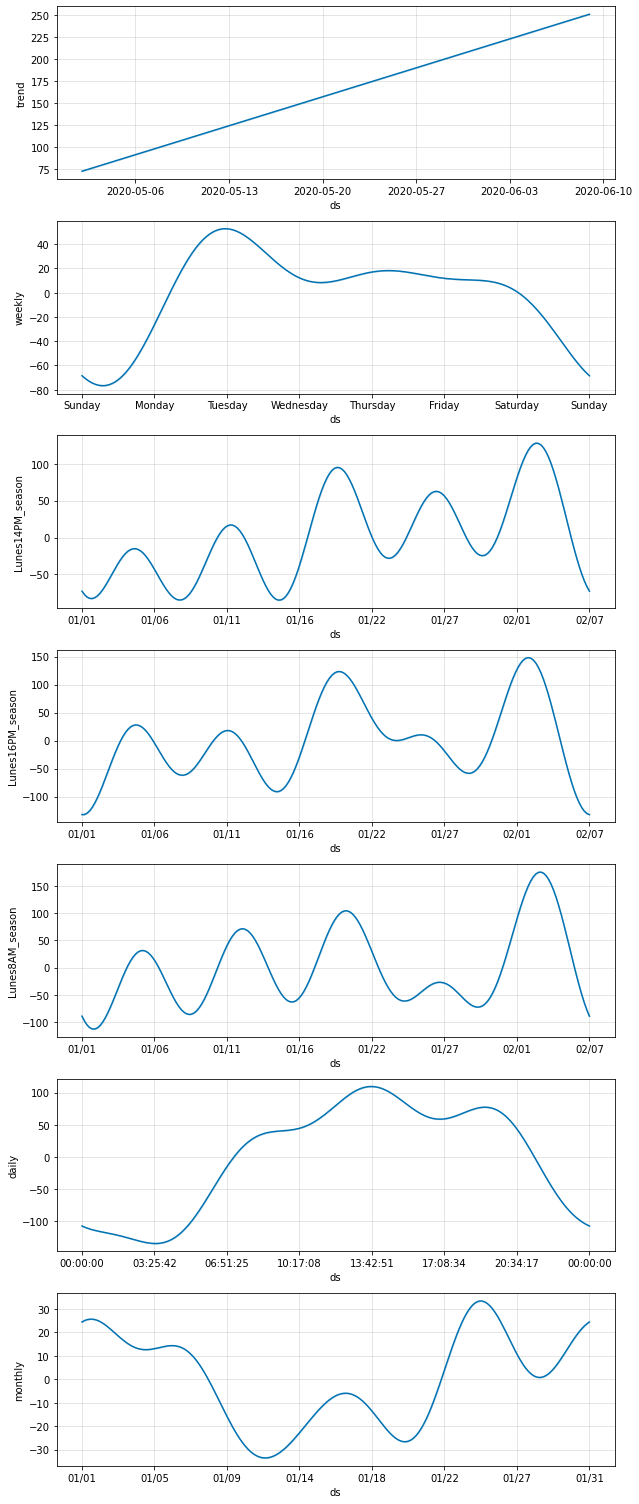

In [17]:
fig, predictions_rolling = rolling_forecast()

In [18]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_D = test_data_D.set_index('ds')

In [19]:
residuals_rolling = test_data_D['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-06-08 00:00:00,7.938369
2020-06-08 01:00:00,-14.922003
2020-06-08 02:00:00,-59.202013
2020-06-08 03:00:00,-34.268285
2020-06-08 04:00:00,-30.982107


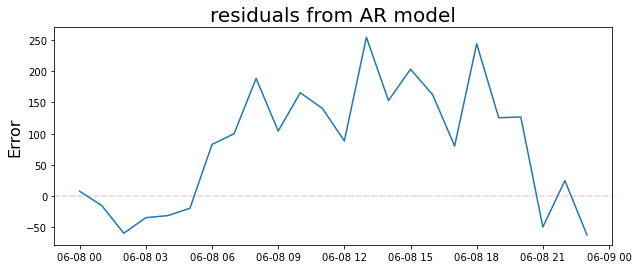

In [20]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

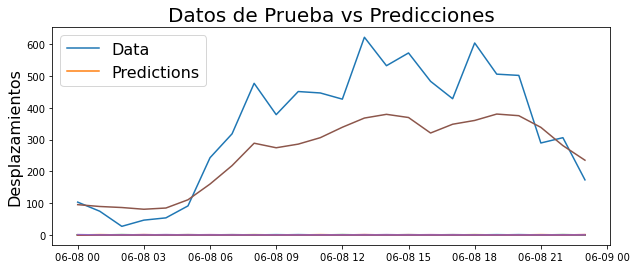

In [21]:
plt.figure(figsize=(10,4))
plt.plot(test_data_D)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [22]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_D['y'])),4))

Mean Absolute Percent Error: 0.3874


# RMSE

In [23]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_D.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    126.636269
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


126.63626935324245

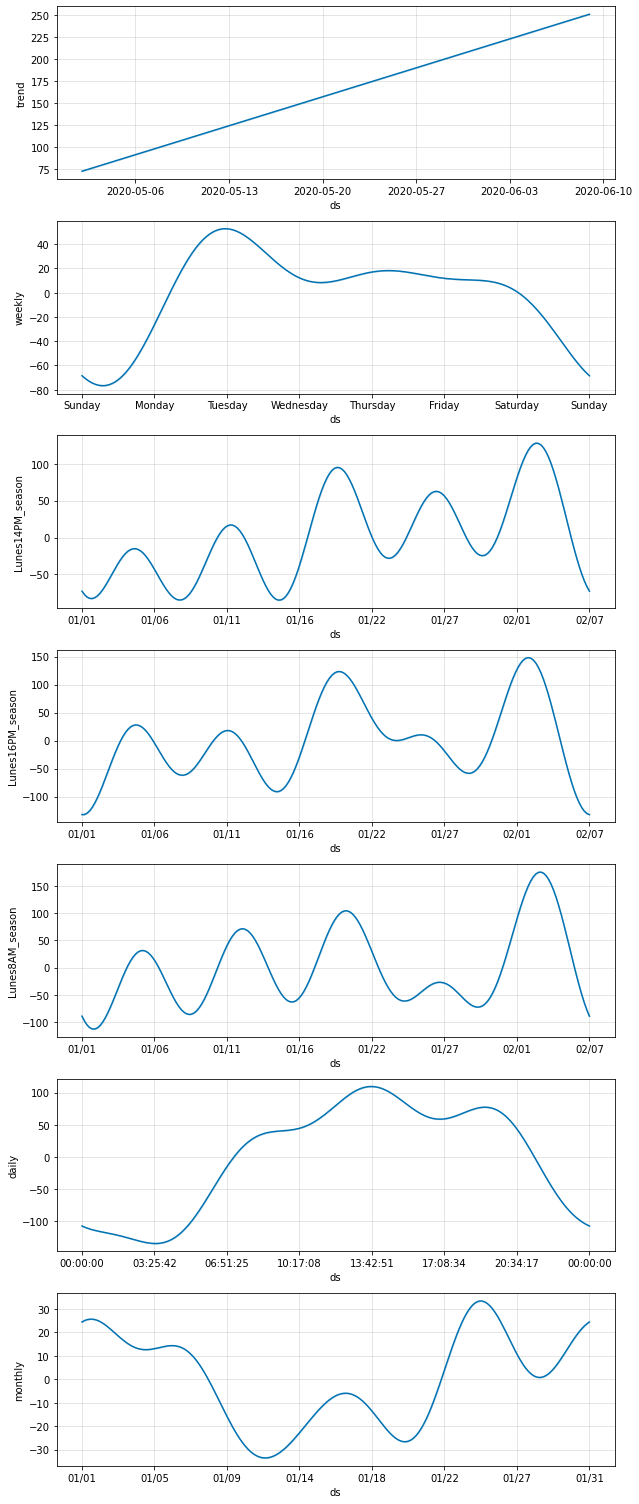

In [24]:
fig

# Nueva Normalidad
## Aplicamos Rolling Forecasting para evaluación del modelo

In [25]:
# Se crea una función de predicción continua
def rolling_forecast():       
    predictions_rolling = pd.DataFrame({})
    history = train_data_N.copy()   # El problema es en history   
    
    for t in range(len(test_data_N)):        
        m = Prophet()          
        #m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
#         m.add_seasonality(name='Lunes24AM_season', period=127, fourier_order=7, condition_name='Lunes24AM')
#         m.add_seasonality(name='Lunes1AM_season', period=127, fourier_order=7, condition_name='Lunes1AM')
#         m.add_seasonality(name='Lunes2AM_season', period=127, fourier_order=7, condition_name='Lunes2AM')
#         m.add_seasonality(name='Lunes3AM_season', period=127, fourier_order=7, condition_name='Lunes3AM')
#         m.add_seasonality(name='Lunes4AM_season', period=127, fourier_order=7, condition_name='Lunes4AM')
#         m.add_seasonality(name='Lunes5AM_season', period=127, fourier_order=7, condition_name='Lunes5AM')
#         m.add_seasonality(name='Lunes6AM_season', period=127, fourier_order=7, condition_name='Lunes6AM')
#         m.add_seasonality(name='Lunes7AM_season', period=127, fourier_order=7, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=71, fourier_order=4, condition_name='Lunes8AM')
#         m.add_seasonality(name='Lunes9AM_season', period=127, fourier_order=7, condition_name='Lunes9AM')
#         m.add_seasonality(name='Lunes10AM_season', period=127, fourier_order=7, condition_name='Lunes10AM')
#         m.add_seasonality(name='Lunes11AM_season', period=127, fourier_order=7, condition_name='Lunes11AM')
#         m.add_seasonality(name='Lunes12PM_season', period=127, fourier_order=7, condition_name='Lunes12PM')
#         m.add_seasonality(name='Lunes13PM_season', period=127, fourier_order=7, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=71, fourier_order=4, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes15PM_season', period=127, fourier_order=7, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=71, fourier_order=4, condition_name='Lunes16PM')
#         m.add_seasonality(name='Lunes17PM_season', period=127, fourier_order=7, condition_name='Lunes17PM')
#         m.add_seasonality(name='Lunes18PM_season', period=127, fourier_order=7, condition_name='Lunes18PM')
#         m.add_seasonality(name='Lunes19PM_season', period=127, fourier_order=7, condition_name='Lunes19PM')
#         m.add_seasonality(name='Lunes20PM_season', period=127, fourier_order=7, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=127, fourier_order=7, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=127, fourier_order=7, condition_name='Lunes22PM')
#         m.add_seasonality(name='Lunes23PM_season', period=127, fourier_order=7, condition_name='Lunes23PM')
        
    
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')           
        
        
        future['Lunes1AM'] = future['ds'].apply(est_Lunes1AM)        
        future['Lunes2AM'] = future['ds'].apply(est_Lunes2AM)        
        future['Lunes3AM'] = future['ds'].apply(est_Lunes3AM)        
        future['Lunes4AM'] = future['ds'].apply(est_Lunes4AM)        
        future['Lunes5AM'] = future['ds'].apply(est_Lunes5AM)        
        future['Lunes6AM'] = future['ds'].apply(est_Lunes6AM)        
        future['Lunes7AM'] = future['ds'].apply(est_Lunes7AM)       
        future['Lunes8AM'] = future['ds'].apply(est_Lunes8AM)        
        future['Lunes9AM'] = future['ds'].apply(est_Lunes9AM)        
        future['Lunes10AM'] = future['ds'].apply(est_Lunes10AM)        
        future['Lunes11AM'] = future['ds'].apply(est_Lunes11AM)        
        future['Lunes12PM'] = future['ds'].apply(est_Lunes12PM)        
        future['Lunes13PM'] = future['ds'].apply(est_Lunes13PM)        
        future['Lunes14PM'] = future['ds'].apply(est_Lunes14PM)        
        future['Lunes15PM'] = future['ds'].apply(est_Lunes15PM)        
        future['Lunes16PM'] = future['ds'].apply(est_Lunes16PM)        
        future['Lunes17PM'] = future['ds'].apply(est_Lunes17PM)        
        future['Lunes18PM'] = future['ds'].apply(est_Lunes18PM)        
        future['Lunes19PM'] = future['ds'].apply(est_Lunes19PM)        
        future['Lunes20PM'] = future['ds'].apply(est_Lunes20PM)        
        future['Lunes21PM'] = future['ds'].apply(est_Lunes21PM)        
        future['Lunes22PM'] = future['ds'].apply(est_Lunes22PM)        
        future['Lunes23PM'] = future['ds'].apply(est_Lunes23PM)        
        future['Lunes24AM'] = future['ds'].apply(est_Lunes24AM)
        
        
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]                
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]  
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)       
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [test_data_N[['ds']].iloc[t]]}
        obs = pd.DataFrame(test_data_N[['ds','y','Lunes1AM','Lunes2AM','Lunes3AM','Lunes4AM','Lunes5AM','Lunes6AM','Lunes7AM','Lunes8AM','Lunes9AM','Lunes10AM','Lunes11AM','Lunes12PM','Lunes13PM','Lunes14PM','Lunes15PM','Lunes16PM','Lunes17PM','Lunes18PM','Lunes19PM','Lunes20PM','Lunes21PM','Lunes22PM','Lunes23PM','Lunes24AM']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras       
        
        #print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
    fig = m.plot_components(forecast)
        
    return fig, predictions_rolling

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -88.8405
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3905.1    0.00470767       156.026           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       3906.05   0.000297148       110.577   4.692e-06       0.001      233  LS failed, Hessian reset 
     188       3906.32   0.000256571       117.477     2.2e-06       0.001      333  LS failed, Hessian reset 
     199        3906.5   0.000479811       54.8224           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       3906.54   0.000143162       75.6809   1.492e-06       0.001      409  LS failed, Hessian reset 
     233       3906.55   8.25144e-09       54.8543   0.0009781      0.7166      443   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -94.4774
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3907.64    0.00449465       138.622      0.5121           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       3908.78    0.00046639       144.098    5.35e-06       0.001      267  LS failed, Hessian reset 
     199       3908.91    0.00184663       72.6441           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       3908.93   5.47118e-05       47.2763   9.562e-07       0.001      370  LS failed, Hessian reset 
     264       3908.97    4.6275e-06       44.7753   1.064e-07       0.001      453  LS failed, Hessian reset 
     276       3908.97   1.67133e-05       45.5816   2.755e-07       0.001      522  LS failed, Hessian reset 
     283       3908.97   4.12367e-07       37.3658      0.3306   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -95.4564
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3908.74    0.00597269        90.258      0.6563      0.6563      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3910.75   2.62992e-05       42.9785      0.5138      0.1287      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       3911.41   0.000227033       62.6123   5.011e-06       0.001      403  LS failed, Hessian reset 
     295       3911.42   1.93354e-05       37.6749    2.68e-07       0.001      461  LS failed, Hessian reset 
     299       3911.42   3.06578e-06       50.8738      0.4658           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       3911.42   2.32176e-07       47.9467      0.3138      0.5958      492   
Optimization terminat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -100.617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       3908.28   0.000140084       64.7033   1.816e-06       0.001      155  LS failed, Hessian reset 
      99       3910.24     0.0112538       108.186       0.937       0.937      183   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182       3912.24   0.000219732       85.5383    4.04e-06       0.001      331  LS failed, Hessian reset 
     199       3912.37   0.000215901       47.8133           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       3912.45   0.000427024       67.0405   7.922e-06       0.001      421  LS failed, Hessian reset 
     299       3912.79   0.000220058       57.2083           1           1      535   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -97.2664
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3912.77     0.0133417       202.398           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       3913.45   0.000339338       126.982   3.458e-06       0.001      219  LS failed, Hessian reset 
     199       3914.09   0.000489052       90.4907    0.006377      0.8828      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       3914.21   2.99354e-05       46.6554   6.427e-07       0.001      387  LS failed, Hessian reset 
     291        3914.5   0.000225716       118.371   3.393e-06       0.001      518  LS failed, Hessian reset 
     299       3914.56    0.00027595       66.3909           1           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -101.732
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3915.08   0.000802885         52.73       1.659      0.3514      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121        3915.3   0.000193435       73.7793   1.293e-06       0.001      194  LS failed, Hessian reset 
     146       3915.45   0.000240415       62.8077   4.998e-06       0.001      278  LS failed, Hessian reset 
     188       3915.51     0.0002869       57.7288   4.476e-06       0.001      372  LS failed, Hessian reset 
     199       3915.51   1.22813e-05       39.6865           1           1      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       3915.95   0.000137347       65.8275   1.624e-06       0.001      527  LS failed, Hessian reset 
     280       3916.02   0.000108662        39.065   3.176e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -89.3186
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3915.64    0.00399465       304.742      0.1629      0.3805      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       3916.06   0.000706776       69.1787   1.627e-05       0.001      173  LS failed, Hessian reset 
     199       3917.14   0.000106314       36.3257           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205        3917.2   0.000313799       82.6612   5.726e-06       0.001      335  LS failed, Hessian reset 
     249       3917.36   1.76981e-05       37.7742   3.803e-07       0.001      426  LS failed, Hessian reset 
     299        3917.4   0.000186147       52.4791           1           1      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -83.9429
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       3918.28   0.000174785       64.4559   1.294e-06       0.001      150  LS failed, Hessian reset 
      99       3918.46    0.00131325       71.3286      0.1722           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       3919.34   0.000214686       100.963   2.094e-06       0.001      274  LS failed, Hessian reset 
     172       3919.41   7.29493e-05       59.0941   1.636e-06       0.001      334  LS failed, Hessian reset 
     199       3919.42   9.90123e-05       36.0486           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       3920.06   0.000108943       65.9705   1.271e-06       0.001      542  LS failed, Hessian reset 
     299       3920.11     0.0021508        91.608       3.784   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -69.547
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       3920.37     0.0013234        63.216   1.361e-05       0.001      153  LS failed, Hessian reset 
      99       3920.44   0.000593484       68.0467           1           1      157   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     174       3921.41   0.000345644       139.812   5.068e-06       0.001      284  LS failed, Hessian reset 
     199       3921.52   0.000543564       49.1493           1           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3922.15    0.00167899       95.8031       0.728       0.728      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       3922.24   9.18735e-05       90.2516   1.534e-06       0.001      533  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -63.4523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3921.01    0.00448138       83.0853           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       3922.95   0.000859271       100.389     1.1e-05       0.001      273  LS failed, Hessian reset 
     199       3923.03    0.00110661       61.2451       1.415      0.3536      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       3923.35   8.35569e-05       52.4251   2.379e-06       0.001      381  LS failed, Hessian reset 
     299       3923.44   0.000423544       38.7089      0.5669      0.5669      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       3923.76   0.000153377        70.271   1.582e-06       0.001      586  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -63.0695
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      94        3923.5   0.000273847       107.233   1.393e-06       0.001      166  LS failed, Hessian reset 
      99       3924.14    0.00213528       86.1422           1           1      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       3924.92   0.000109902       49.3624    1.57e-06       0.001      285  LS failed, Hessian reset 
     199       3925.35    1.7077e-05       53.2298      0.7424      0.7424      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       3925.53   7.03211e-05       61.9706   1.072e-06       0.001      478  LS failed, Hessian reset 
     299       3925.56   1.43024e-05       51.9772      0.5026      0.5026      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -62.9159
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3926.04    0.00237995       277.945           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       3926.85   4.04153e-06       48.6195   1.001e-07       0.001      260  LS failed, Hessian reset 
     199       3926.95   0.000510184        32.465           1           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       3927.42   0.000905314       92.8012   1.113e-05       0.001      423  LS failed, Hessian reset 
     264       3927.44    5.3369e-07       53.9785   1.575e-08       0.001      510  LS failed, Hessian reset 
     269       3927.44   3.28447e-07       54.4924      0.7591      0.7591      515   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -65.4212
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3927.5    0.00667309       82.7856           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108        3927.9   0.000264126       120.949   2.128e-06       0.001      180  LS failed, Hessian reset 
     199       3929.32   0.000474306       52.5462      0.2978      0.2978      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       3929.48   0.000136507       54.9658   1.819e-06       0.001      364  LS failed, Hessian reset 
     299       3929.72   2.66361e-05        48.161           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       3929.72   3.27751e-05       35.4818   4.376e-07       0.001      510  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -62.9384
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3930.08    0.00307851        84.049      0.4005           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3931.99   0.000194129       72.1695           1           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       3932.05   0.000163346       86.9342   2.925e-06       0.001      341  LS failed, Hessian reset 
     238       3932.06   2.74201e-06        54.037   8.459e-08       0.001      398  LS failed, Hessian reset 
     257       3932.07   2.27128e-07       43.6127      0.9474      0.9474      434   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -66.0855
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3932.36    0.00437936       61.1812           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       3934.21   0.000102816       51.0435   1.155e-06       0.001      270  LS failed, Hessian reset 
     199       3934.52   0.000563998       51.1782           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       3934.56   0.000267176       54.3266   4.486e-06       0.001      345  LS failed, Hessian reset 
     296       3934.76   0.000136912       61.1104   1.992e-06       0.001      517  LS failed, Hessian reset 
     299       3934.77   0.000217044       43.2401       4.078      0.4078      521   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -71.6398
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3935.18     0.0104002       215.596           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3936.81   0.000506583       66.7173      0.7859      0.7859      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       3936.98   0.000294697       80.7484   4.989e-06       0.001      331  LS failed, Hessian reset 
     284       3937.06   0.000143484       49.0239   2.321e-06       0.001      467  LS failed, Hessian reset 
     299       3937.06   1.11735e-06       61.9842      0.3279      0.3279      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       3937.07   3.35026e-05        64.251   5.523e-07       0.001      586  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -63.2633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3937.38    0.00140666       137.514           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       3938.01   0.000306398       109.067   1.223e-06       0.001      174  LS failed, Hessian reset 
     193       3938.94   0.000159648       87.1566   1.666e-06       0.001      307  LS failed, Hessian reset 
     199       3939.07   0.000848653       84.0526      0.9185      0.9185      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       3939.29   0.000127552       80.3941   2.068e-06       0.001      414  LS failed, Hessian reset 
     284       3939.36   6.46197e-05       46.7224   1.111e-06       0.001      527  LS failed, Hessian reset 
     299       3939.36   2.13072e-05       48.4558           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -83.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3940    0.00705467         341.7      0.2952           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       3941.22   0.000283843       108.821   4.503e-06       0.001      292  LS failed, Hessian reset 
     199       3941.23   7.21916e-06       38.9524       2.308      0.2308      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       3941.23   1.88999e-05       58.9174   2.901e-07       0.001      374  LS failed, Hessian reset 
     219       3941.23   1.18485e-07       53.6243     0.05684           1      398   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -65.9243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      64       3940.42   0.000428527       133.339   5.503e-06       0.001      117  LS failed, Hessian reset 
      99       3941.96     0.0025426       59.7037           1           1      163   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109        3942.5    0.00107024       232.674   1.591e-05       0.001      201  LS failed, Hessian reset 
     145       3942.86   0.000182753       94.4186   3.232e-06       0.001      288  LS failed, Hessian reset 
     199       3943.33    0.00154223       141.821      0.4737      0.4737      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       3943.44   0.000905946       145.775   1.427e-05       0.001      414  LS failed, Hessian reset 
     289       3943.74   1.37839e-05       54.7173   2.156e-07   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -70.4127
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3943.49    0.00184598       114.959      0.3199      0.3199      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       3944.42   0.000446376       164.105   4.377e-06       0.001      174  LS failed, Hessian reset 
     137        3945.1    0.00047265       139.563   8.148e-06       0.001      242  LS failed, Hessian reset 
     199       3945.43   0.000679382       60.4042      0.6877      0.6877      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       3945.66   0.000237472       108.884   2.576e-06       0.001      376  LS failed, Hessian reset 
     280       3945.88   1.20636e-05       46.2905   2.661e-07       0.001      520  LS failed, Hessian reset 
     299       3945.92   0.000788853        52.763           1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -67.3271
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3946.45     0.0252522       242.379           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       3947.19   0.000202771       61.2545    1.09e-06       0.001      193  LS failed, Hessian reset 
     199       3948.24   0.000634639       63.1611           1           1      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       3948.43   0.000167136        52.625   2.095e-06       0.001      501  LS failed, Hessian reset 
     299       3948.49   1.91346e-05       48.0723       4.105           1      555   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3948.6   3.44879e-05       38.6808      0.0381           1      684   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -66.5512
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3947.2     0.0252096       138.742           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       3948.02   0.000245859       63.4543   4.068e-06       0.001      228  LS failed, Hessian reset 
     177       3948.19   0.000314625        75.283   5.608e-06       0.001      300  LS failed, Hessian reset 
     192       3948.23   0.000293029       59.8363   6.827e-06       0.001      360  LS failed, Hessian reset 
     199       3948.24   8.90704e-05       47.0785           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3948.69   3.29786e-05        50.877      0.8548      0.8548      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -69.5907
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3947.97    0.00438396       103.236           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122        3949.2   0.000756788       156.129   7.565e-06       0.001      206  LS failed, Hessian reset 
     145        3949.8   0.000116496       49.3251   1.415e-06       0.001      271  LS failed, Hessian reset 
     165       3949.96   0.000184583       38.9115    3.54e-06       0.001      345  LS failed, Hessian reset 
     180       3949.97   1.77114e-05       40.8292   3.099e-07       0.001      406  LS failed, Hessian reset 
     199       3949.97   0.000262665       54.9478           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     271       3950.47   0.000775955       79.7688   1.095e-05   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be rem

Initial log joint probability = -79.8992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       3950.18    0.00409119       198.245   5.967e-05       0.001      150  LS failed, Hessian reset 
      99        3950.9    0.00241218       55.1378           1           1      164   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       3951.43   0.000248379        87.917    1.27e-06       0.001      236  LS failed, Hessian reset 
     147       3951.82    0.00015472        76.706    2.33e-06       0.001      307  LS failed, Hessian reset 
     199       3952.05    0.00154798        62.982      0.5702      0.5702      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211        3952.3   0.000229376       107.592   1.957e-06       0.001      434  LS failed, Hessian reset 
     221       3952.42   5.16592e-05       53.6422   1.375e-06   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_12455/4222850820.py:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_co

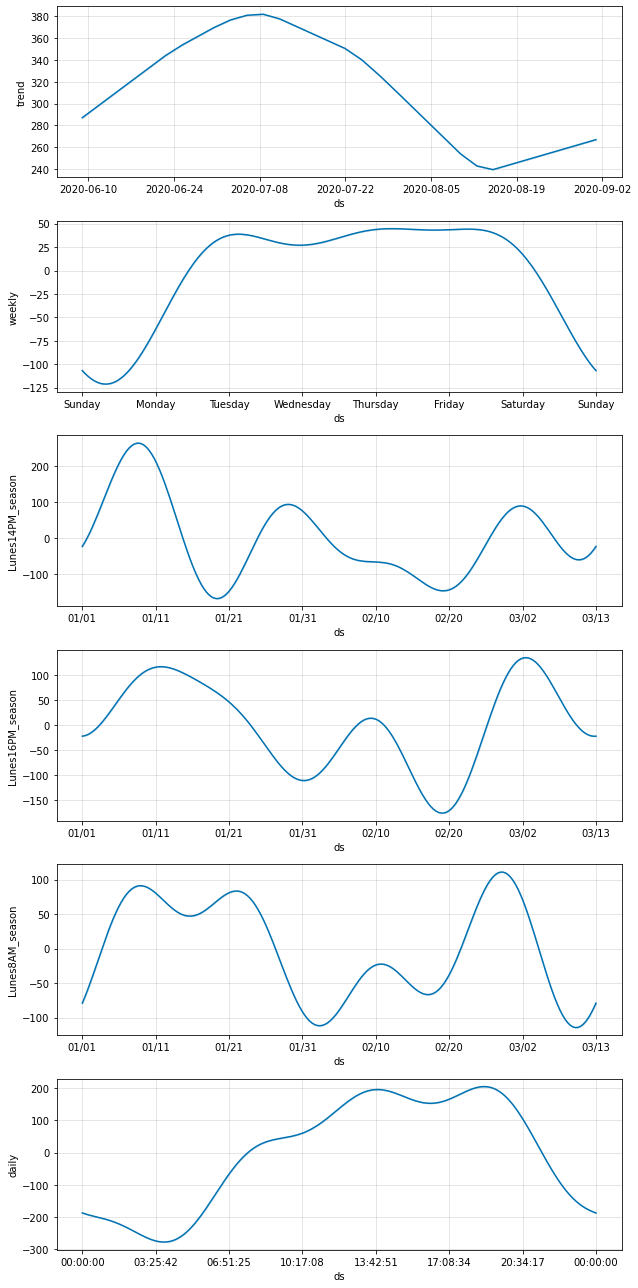

In [26]:
fig, predictions_rolling = rolling_forecast()

In [27]:
predictions_rolling = predictions_rolling.set_index('ds')
test_data_N = test_data_N.set_index('ds')

In [28]:
residuals_rolling = test_data_N['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,81.129437
2020-08-31 01:00:00,87.186411
2020-08-31 02:00:00,80.662802
2020-08-31 03:00:00,121.670410
2020-08-31 04:00:00,107.684625


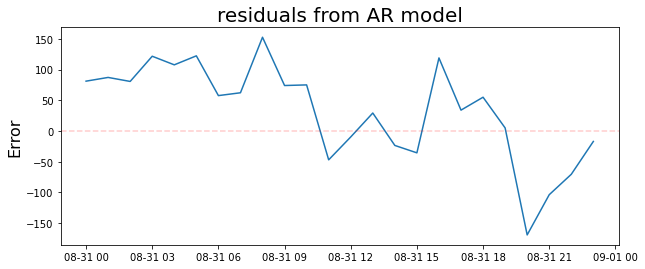

In [29]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

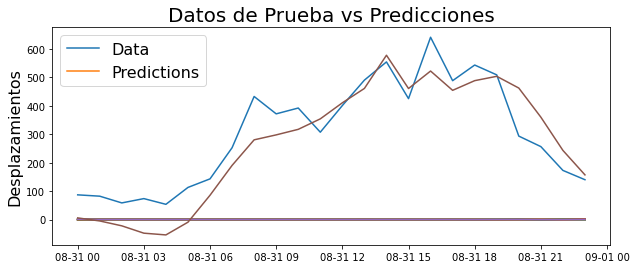

In [30]:
plt.figure(figsize=(10,4))
plt.plot(test_data_N)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [31]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_N['y'])),4))

Mean Absolute Percent Error: 0.4897


# RMSE

In [32]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_N.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    84.542044
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


84.54204364025394

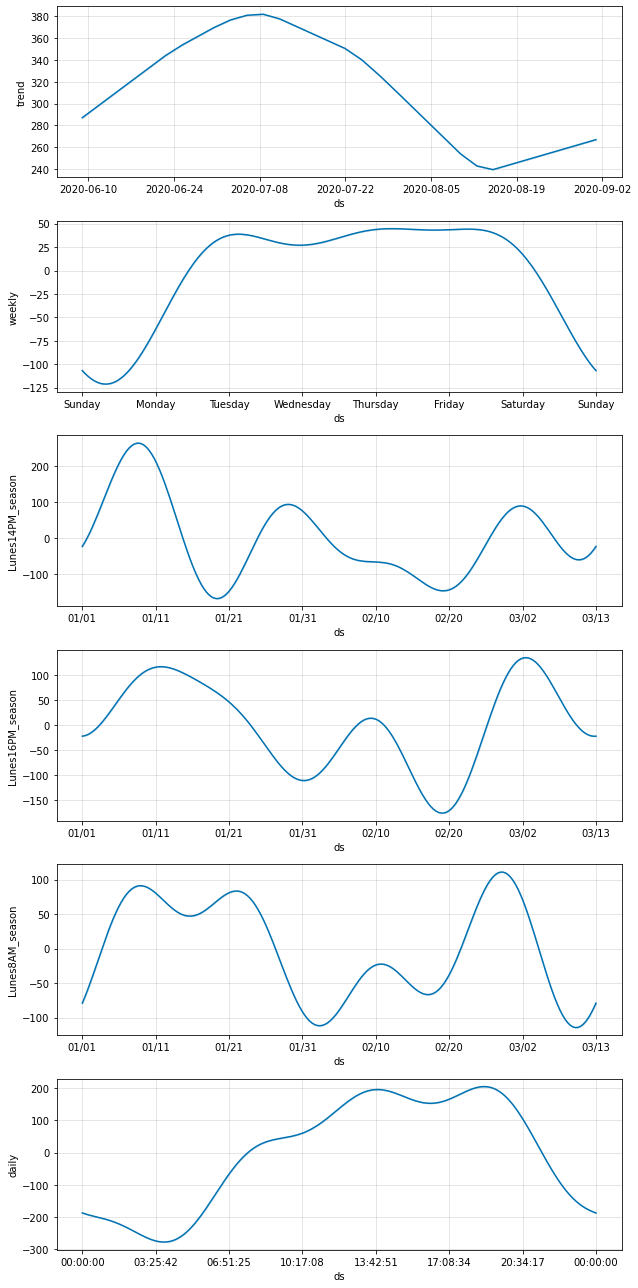

In [33]:
fig

# Graficas de Patrones 
## Desescalada

In [34]:
train_data_N

,ds,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
0,2020-06-09 00:00:00,90.946,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2020-06-09 01:00:00,64.043,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-06-09 02:00:00,48.919,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-06-09 03:00:00,14.514,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-06-09 04:00:00,64.216,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,2020-08-30 19:00:00,251.936,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1988,2020-08-30 20:00:00,241.457,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1989,2020-08-30 21:00:00,236.716,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1990,2020-08-30 22:00:00,150.688,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
mask8AM = (train_data_N['Lunes8AM'] == True)
mask14PM = (train_data_N['Lunes14PM'] == True)
mask16PM = (train_data_N['Lunes16PM'] == True)
Patron8AM_N = train_data_N.loc[mask8AM]
Patron14PM_N = train_data_N.loc[mask14PM]
Patron16PM_N = train_data_N.loc[mask16PM]

In [36]:
Patron8AM_N = Patron8AM_N.set_index('ds')
Patron14PM_N = Patron14PM_N.set_index('ds')
Patron16PM_N = Patron16PM_N.set_index('ds')

In [37]:
Patron8AM_N.tail()

,y,Lunes1AM,Lunes2AM,Lunes3AM,Lunes4AM,Lunes5AM,Lunes6AM,Lunes7AM,Lunes8AM,Lunes9AM,...,Lunes15PM,Lunes16PM,Lunes17PM,Lunes18PM,Lunes19PM,Lunes20PM,Lunes21PM,Lunes22PM,Lunes23PM,Lunes24AM
ds,,,,,,,,,,,,,,,,,,,,,
2020-07-27 08:00:00,456.258,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2020-08-03 08:00:00,303.861,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2020-08-10 08:00:00,310.196,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2020-08-17 08:00:00,313.433,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2020-08-24 08:00:00,319.591,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


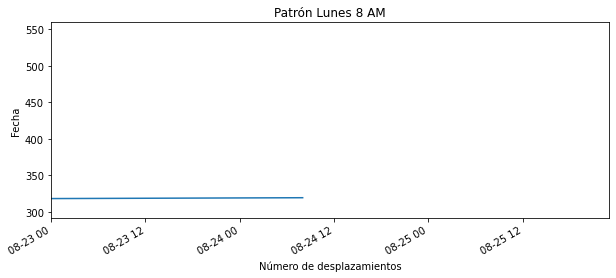

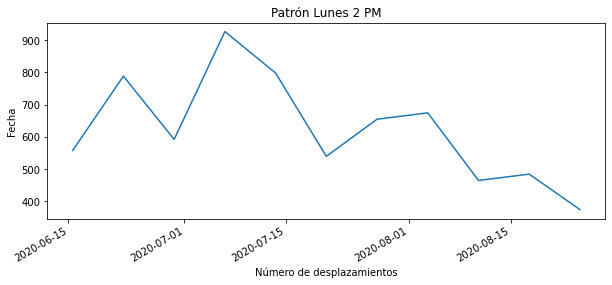

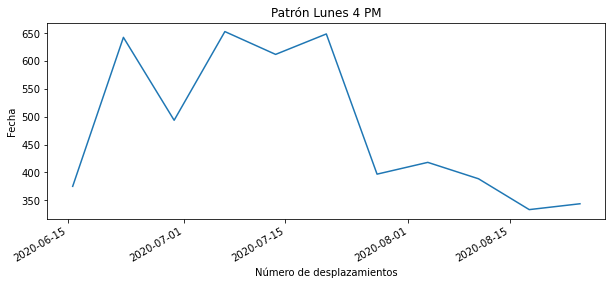

In [38]:
Patron8AM_N[Patron8AM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 8 AM')
plt.xlim([pd.to_datetime('2020-08-23 00:00:00'), pd.to_datetime('2020-08-25 23:00:00')])
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron14PM_N[Patron14PM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 2 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

Patron16PM_N[Patron16PM_N.columns[0]].plot(figsize=(10,4), legend=None, title='Patrón Lunes 4 PM')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Nota: Creo que se puede mejorar la predicción si se ajusta el patrón tal cual como se ve en la linea de tiempo (123) y se entrena periodos concretos como desescalada y nueva normalidad.
# Con el in de avanzar propongo que muestre los resultados que has obtenido hasta ahora y lo siguiente es tratar de hacer una simulación implementando un regresor. 
# Aunque la imagen de los patrones no corresponda con la gráfica de patrones original, de todas formas está bien entrenado.